使用 R 语言 {netmeta}包实现频率网状 Meta 分析。

In [ ]:
library(netmeta)

Loading required package: meta
Loading required package: metadat
Loading 'meta' package (version 8.0-2).
Type 'help(meta)' for a brief overview.
Loading 'netmeta' package (version 3.0-2).
Type 'help("netmeta-package")' for a brief overview.


# 数据准备

先查看一下数据

In [ ]:
load("dmatar_data/TherapyFormats.rda")

In [11]:
head(TherapyFormats)

         author     TE  seTE treat1 treat2 treat1.long treat2.long     versus
1  Ausbun, 1997  0.092 0.195    ind    grp  Individual       Group ind vs grp
2  Crable, 1986 -0.675 0.350    ind    grp  Individual       Group ind vs grp
3  Thiede, 2011 -0.107 0.198    ind    grp  Individual       Group ind vs grp
4 Bonertz, 2015 -0.090 0.324    ind    grp  Individual       Group ind vs grp
5     Joy, 2002 -0.135 0.453    ind    grp  Individual       Group ind vs grp
6   Jones, 2013 -0.217 0.289    ind    grp  Individual       Group ind vs grp

# 模型拟合

In [12]:
m_netmeta <- netmeta(
  TE = TE,
  seTE = seTE,
  treat1 = treat1,
  treat2 = treat2,
  studlab = author,
  data = TherapyFormats,
  sm = "SMD",
  common = TRUE,
  random = FALSE,
  reference.group = "cau",
  details.chkmultiarm = TRUE,
  sep.trts = "vs"
  )

In [13]:
summary(m_netmeta)

Original data (with adjusted standard errors for multi-arm studies):

                         treat1 treat2      TE   seTE seTE.adj narms multiarm
Ausbun, 1997                grp    ind -0.0920 0.1950   0.1950     2         
Crable, 1986                grp    ind  0.6750 0.3500   0.3500     2         
Thiede, 2011                grp    ind  0.1070 0.1980   0.1980     2         
Bonertz, 2015               grp    ind  0.0900 0.3240   0.3240     2         
Joy, 2002                   grp    ind  0.1350 0.4530   0.4530     2         
Jones, 2013                 grp    ind  0.2170 0.2890   0.2890     2         
Aaron, 2004                 grp    ind -0.1030 0.4010   0.4010     2         
Breiman, 2001               gsh    ind  0.0850 0.5160   0.6340     3        *
Lucero, 2001                gsh    ind  0.0520 0.5000   0.5000     2         
Amsberry, 2010              gsh    ind  0.1090 0.4130   0.4130     2         
Robinson, 2015              gsh    ind  0.1280 0.2560   0.2560     2    

In [14]:
# 使用随机效应模型
decomp.design(m_netmeta)

Q statistics to assess homogeneity / consistency

                      Q  df  p-value
Total           1696.94 177 < 0.0001
Within designs  1595.04 165 < 0.0001
Between designs  101.90  12 < 0.0001

Design-specific decomposition of within-designs Q statistic

   Design       Q df  p-value
 gshvswlc 1026.72 34 < 0.0001
 grpvswlc  303.80 17 < 0.0001
 cauvsind  100.00 29 < 0.0001
 cauvsgrp   82.50 20 < 0.0001
 indvswlc   52.66 16 < 0.0001
 cauvstel   11.40  5   0.0440
 indvstel    1.86  3   0.6026
 cauvsush    5.94  8   0.6539
 grpvsind    4.10  6   0.6636
 grpvsgsh    2.17  4   0.7037
 gshvsush    0.79  4   0.9395
 gshvsind    0.02  2   0.9909
 ushvswlc    2.37 10   0.9927
 cauvsgsh    0.72  7   0.9982

Between-designs Q statistic after detaching of single designs
(influential designs have p-value markedly different from < 0.0001)

 Detached design      Q df  p-value
        cauvsgrp  25.92 11   0.0067
        grpvswlc  58.10 11 < 0.0001
        indvswlc  77.23 11 < 0.0001
        cauvsi

# 网络模型的进一步探索
## 网络图

In [15]:
# Show treatment order (shortened labels)
m_netmeta$trts

[1] "cau" "grp" "gsh" "ind" "tel" "ush" "wlc"

Error in dyn.load(dynlib <- getDynlib(dir)) : 
  unable to load shared object '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so':
  dlopen(/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so, 0x0006): Library not loaded: /opt/X11/lib/libGLU.1.dylib
  Referenced from: <9B3ADEB8-F899-36CC-87F7-93607BF86B8C> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so
  Reason: tried: '/Library/Frameworks/R.framework/Resources/lib/libGLU.1.dylib' (no such file), '/opt/X11/lib/libGLU.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libGLU.1.dylib' (no such file), '/opt/X11/lib/libGLU.1.dylib' (no such file), '/usr/local/lib/libGLU.1.dylib' (no such file), '/usr/lib/libGLU.1.dylib' (no such file, not in dyld cache)
Warning messages:
1: 	Loading rgl's DLL failed. 
	This build of rgl depends on XQuartz, which failed to load.
 See the discussion in https://stackoverflow.com/a/

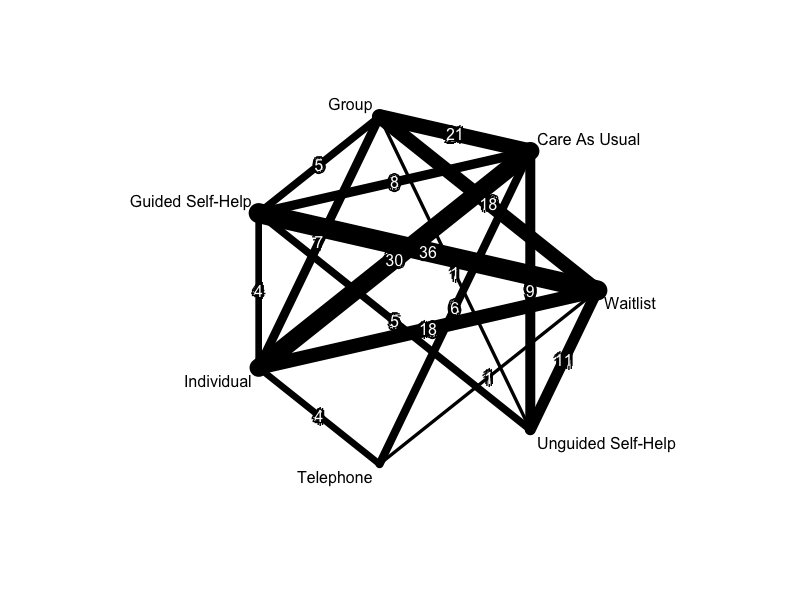

In [16]:
# Replace with full name (see treat1.long and treat2.long)
long_labels <- c("Care As Usual", "Group", 
                 "Guided Self-Help", 
                 "Individual", "Telephone", 
                 "Unguided Self-Help", 
                 "Waitlist")

netgraph(m_netmeta, 
         labels = long_labels)

In [17]:
install.packages("rgl")

trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/rgl_1.3.17.tgz'
Content type 'application/x-gzip' length 12403311 bytes (11.8 MB)
downloaded 11.8 MB




The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmp7VvaDl/downloaded_packages


In [18]:
library(rgl)
netgraph(m.netmeta, dim = "3d")

Registered S3 methods overwritten by 'rgl':
  method               from
  knit_print.rglId         
  knit_print.rglOpen3d     
  sew.rglRecordedplot      


Error in dyn.load(dynlib <- getDynlib(dir)) : 
  unable to load shared object '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so':
  dlopen(/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so, 0x0006): Library not loaded: /opt/X11/lib/libGLU.1.dylib
  Referenced from: <9B3ADEB8-F899-36CC-87F7-93607BF86B8C> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgl/libs/rgl.so
  Reason: tried: '/Library/Frameworks/R.framework/Resources/lib/libGLU.1.dylib' (no such file), '/opt/X11/lib/libGLU.1.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libGLU.1.dylib' (no such file), '/opt/X11/lib/libGLU.1.dylib' (no such file), '/usr/local/lib/libGLU.1.dylib' (no such file), '/usr/lib/libGLU.1.dylib' (no such file, not in dyld cache)
Warning messages:
1: 	Loading rgl's DLL failed. 
	This build of rgl depends on XQuartz, which failed to load.
 See the discussion in https://stackoverflow.com/a/

: [1m[33mError[39m:[22m
[33m![39m package or namespace load failed for ‘rgl’:
 .onLoad failed in loadNamespace() for 'rgl', details:
  call: rgl.init(initValue, onlyNULL)
  error: OpenGL is not available in this build

## 可视化直接和间接证据

In [3]:
install.packages("gridExtra")

trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/gridExtra_2.3.tgz'
Content type 'application/x-gzip' length 1105951 bytes (1.1 MB)
downloaded 1.1 MB




The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmp7VvaDl/downloaded_packages


In [4]:
install.packages("dmetar")

Warning message:
package ‘dmetar’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages 


由于 dmetar 包不适合当前 4.4.2 的 R 版本，因此选择直接复制源代码。

In [22]:
#' Plot for direct evidence proportions in a network meta-analysis using \code{netmeta}
#'
#' This function plots relevant measures quantifying the direct evidence proportion, mean path length
#' and aggregated minimal parallelism of a frequentist network meta-analysis model generated by
#' \code{\link[netmeta]{netmeta}}.
#'
#' @usage direct.evidence.plot(x, random=FALSE, comparison.label.size=2,
#' numeric.label.size=3, subplot.ratio=c(5, 1.3, 1.3))
#'
#' @param x An object of class \code{netmeta} containing the results of a network meta-analysis
#' using the \code{\link[netmeta]{netmeta}} function.
#' @param random Logical. If set to \code{TRUE}, results for the random-effects model are displayed.
#' If set to \code{FALSE}, results for the fixed-effect model are displayed. \code{FALSE} by default.
#' @param comparison.label.size A numeric value for the size of comparison labels
#' to be used in the plot. Default is \code{2}.
#' @param numeric.label.size A numeric value for the label size of numeric values
#' to be used in the plot. Default is \code{3}.
#' @param subplot.ratio A numeric vector containing three numbers. Defines the width for each of
#' the three subplots included in the plot (from left to right). Default is \code{c(5,1.3,1.3)}.
#'
#' @details
#' The function generates a plot containing three subplots displaying relevant characteristics
#' to evaluate the reliability of effect size estimates within a network meta-analysis model.
#' \itemize{
#' \item \strong{Direct Evidence Proportion}. This bar chart displays the proportion of direct
#' evidence (orange) contained in each network estimate. It is of note that both direct and indirect
#' evidence may contribute to the violation of the assumption of consistency underlying network
#' meta-analysis models. Nevertheless, this plot allows to distinguish comparison estimates
#'  for which direct evidence was used, and to what extent, and comparisons which had to be inferred
#'  by indirect evidence alone.
#' \item \strong{Minimal Parallelism}. This bar chart displays the minimum number of independent paths
#' contributing to the effect estimate on an aggregated level. Large values of parallelism can be
#' interpreted as supporting the robustness of the estimate.
#' \item \strong{Mean Path Length}. This bar chart displays the mean path length, which characterizes
#' the degree of indirectness of an estimate. Higher mean path lengths indicate less reliable
#' estimates, given that more similarity assumptions have to be made when serially combining
#' direct comparisons. Following König, Krahn and Binder
#' (\href{https://www.ncbi.nlm.nih.gov/pubmed/24123165}{2013}), comparisons with mean path lengths
#' greater than two should be interpreted with caution. This threshold is displayed as a blue vertical
#' line in the plot.
#' }
#'
#'
#' @references Harrer, M., Cuijpers, P., Furukawa, T.A, & Ebert, D. D. (2019).
#' \emph{Doing Meta-Analysis in R: A Hands-on Guide}. DOI: 10.5281/zenodo.2551803. \href{https://bookdown.org/MathiasHarrer/Doing_Meta_Analysis_in_R/frequentist-network-meta-analysis.html}{Chapter 11.1}
#'
#' König J., Krahn U., Binder H. (2013): Visualizing the flow of evidence in network meta-analysis and
#' characterizing mixed treatment comparisons. \emph{Statistics in Medicine, 32}, 5414–29
#'
#' @author Mathias Harrer & David Daniel Ebert
#'
#' @import ggplot2 netmeta
#' @importFrom gridExtra grid.arrange arrangeGrob
#' @importFrom scales percent
#' @importFrom graphics abline axis lines mtext par plot points rect segments text
#' @importFrom stats as.formula hat influence ks.test optimize pbinom pchisq pf pnorm pt punif qchisq qf qnorm qt reformulate reorder setNames uniroot
#'
#' @return
#' \itemize{
#' \item \code{data}: A \code{data.frame} containing columns for the proportion of direct and indirect
#' evidence of each comparison (\code{proportion.direct} and \code{proportion.indirect}), the
#' mean path length (\code{meanpath}) and the minimal parallelism (\code{minpar})
#' for each comparison.
#' \item \code{plot}: The generated plot (if the function output was saved to an object).
#' }
#'
#' @export direct.evidence.plot
#'
#' @seealso
#' \code{\link[netmeta]{netmeta}}, \code{\link[netmeta]{netmeasures}}
#'
#' @examples
#' \dontrun{
#' # Load Senn2013 data from netmeta
#' suppressPackageStartupMessages(library(netmeta))
#' data(Senn2013)
#'
#' # Conduct network meta-analysis (fixed-effects model)
#' nma = netmeta(TE, seTE, treat1, treat2, studlab,
#'               data=Senn2013, sm='MD', comb.random=FALSE)
#'
#' # Generate the plot
#' dep = direct.evidence.plot(nma, random=FALSE, comparison.label.size = 1,
#' numeric.label.size=1, subplot.ratio=c(3,1,1))
#' dep}



direct.evidence.plot = function(x,
  random = FALSE,
  comparison.label.size = 2,
  numeric.label.size = 3,
  subplot.ratio = c(5,1.3, 1.3)) {

# Validate
x = x
random = random
cts = comparison.label.size
nts = numeric.label.size
spr = subplot.ratio

if (class(x) != "netmeta") {
stop("Input to this function has to be an object of class 'netmeta' created by the 'netmeta::netmeta' function.")
}

# PLOT 1: Direct and Indirect Evidence ####

# Get Measures
measures = netmeasures(x, random = random)$proportion
indirect = 1 - measures
measures = data.frame(comparison = names(measures), direct = measures, indirect = indirect)
rownames(measures) = c()
measures$direct = round(measures$direct, 4)
measures$indirect = round(measures$indirect, 4)
measures.reshape = with(measures, {
data.frame(comparison = rep(comparison, 2),
variable = rep(c("direct", "indirect"),
    each = nrow(measures)),
value = c(direct, indirect))
})
names = measures.reshape[measures.reshape$variable == "direct", ]$comparison
direct = measures.reshape[measures.reshape$variable == "direct", ]$value
names = names[order(match(names, direct))]

# Reorder Label
measures$comparison = factor(measures$comparison,
   levels = measures$comparison[rev(order(measures$direct))])
levels = levels(measures$comparison)
measures.reshape$comparison = factor(measures.reshape$comparison, levels = levels)



# Plot
PlotDirectEvidence = ggplot2::ggplot(measures.reshape, aes(x = factor(comparison, levels = rev(levels(comparison))), fill = factor(variable,
levels = c("indirect", "direct")), y = value)) + geom_bar(stat = "identity", position = "fill") +
coord_flip() + theme_minimal() + theme(legend.position = "left") + scale_y_continuous(labels = scales::percent) +
ylab("Percentage") + xlab("Network Estimate") + guides(fill = guide_legend(title = "Evidence")) +
scale_fill_manual(values = c("lightblue", "orange")) + geom_hline(aes(yintercept = 0.25), color = "white") +
geom_hline(aes(yintercept = 0.5), color = "white") + geom_hline(aes(yintercept = 0.75), color = "white")




# PLOT 2: Mean Path Length ####

# Get Measures
mpath = netmeasures(x, random = random)$meanpath
path.df = data.frame(comparison = names(mpath), mpath = mpath)
rownames(path.df) = c()
path.df$comparison = factor(path.df$comparison, levels = levels)


# Plot for summary plot
PlotMeanPathLength_s = ggplot2::ggplot(path.df, aes(x = factor(comparison, levels = rev(levels(comparison))), y = mpath)) + geom_bar(stat = "identity",
fill = "lightgray") + coord_flip() + geom_hline(aes(yintercept = 2), color = "blue") + geom_text(aes(x = comparison,
y = 0.4, label = comparison), color = "gray23", size = cts) + geom_text(aes(x = comparison, y = mpath +
0.1, label = round(mpath, 1)), size = nts) + ylab("Mean Path Length") + theme(axis.title.y = element_blank(),
axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.ticks.x = element_blank(), panel.background = element_blank()) +
scale_x_discrete(position = "top")



# PLOT 3: Parallelism ####

# Get Measures
mpar = netmeasures(x, random = random)$minpar
mpar.df = data.frame(comparison = names(mpar), mpar = mpar)
rownames(mpar.df) = c()
mpar.df$comparison = factor(mpar.df$comparison, levels = levels)

# Plot for summary plot
PlotMinimalParallelism_s = ggplot2::ggplot(mpar.df, aes(x = factor(comparison, levels = rev(levels(comparison))), y = mpar)) +
geom_bar(stat = "identity", fill = "lightgray") + coord_flip() + geom_text(aes(x = comparison, y = mpar +
0.1, label = round(mpar, 1)), size = nts) + geom_text(aes(x = comparison, y = 0.4, label = comparison),
color = "gray23", size = cts) + ylab("Minimal Parallelism") + theme(axis.ticks.y = element_blank(),
axis.ticks.x = element_blank(), axis.title.y = element_blank(), axis.text.y = element_blank(), panel.background = element_blank())


# Process for return ####

# Save data used for plotting in df
data = data.frame(proportion.direct = measures$direct,
proportion.indirect = measures$indirect,
meanpath = mpath,
minpar = mpar)

# Set title
if (random == FALSE) {
plot_title = "Direct evidence proportion for each network estimate (fixed-effect model)"
} else {
plot_title = "Direct evidence proportion for each network estimate (random-effects model)"
}

grid = gridExtra::arrangeGrob(PlotDirectEvidence, PlotMinimalParallelism_s, PlotMeanPathLength_s, ncol = 3, widths = spr,
heights = c(4), top = plot_title)

returnlist = list(data = data, plot = grid)

class(returnlist) = "direct.evidence.plot"

invisible(returnlist)

returnlist

}


In [21]:
# 使用direct.evidence.plot()函数前需要确保已经加载{ggplot2}和{gridExtra}包
library(ggplot2)
library(gridExtra)

In [ ]:
d_evidence <- direct.evidence.plot(m_netmeta)

In [25]:
summary(d_evidence)

     Length Class      Mode
data 4      data.frame list
plot 4      gtable     list

In [26]:
d_evidence$data

         proportion.direct proportion.indirect meanpath   minpar
cauvsgrp            0.5838              0.4162 1.686599 1.713025
cauvsgsh            0.2224              0.7776 2.317441 1.957564
cauvsind            0.7082              0.2918 1.509729 1.412002
cauvstel            0.3516              0.6484 1.932072 2.267229
cauvsush            0.3529              0.6471 2.111886 2.833635
cauvswlc            0.0000              1.0000 2.106248 2.758412
grpvsgsh            0.2374              0.7626 1.975547 1.841692
grpvsind            0.0918              0.9082 2.078420 2.073314
grpvstel            0.0000              1.0000 2.496669 2.265393
grpvsush            0.1652              0.8348 1.970634 2.664592
grpvswlc            0.5768              0.4232 1.664465 1.733606
gshvsind            0.0347              0.9653 2.392120 1.733851
gshvstel            0.0000              1.0000 2.756563 1.696732
gshvsush            0.2925              0.7075 1.984531 2.135013
gshvswlc            0.733

In [27]:
plot(d_evidence)

: [1m[33mError[39m in `xy.coords()`:[22m
[33m![39m 'x' is a list, but does not have components 'x' and 'y'

## 效应估计表

In [28]:
result_matrix <- m_netmeta$TE.fixed
result_matrix <- round(result_matrix, 2)

In [29]:
result_matrix[lower.tri(result_matrix, diag = FALSE)] <- NA

In [30]:
result_matrix

    cau  grp   gsh  ind   tel   ush   wlc
cau   0 0.58  0.39 0.64  0.51  0.13 -0.26
grp  NA 0.00 -0.18 0.06 -0.06 -0.45 -0.84
gsh  NA   NA  0.00 0.25  0.12 -0.26 -0.65
ind  NA   NA    NA 0.00 -0.13 -0.51 -0.90
tel  NA   NA    NA   NA  0.00 -0.38 -0.77
ush  NA   NA    NA   NA    NA  0.00 -0.39
wlc  NA   NA    NA   NA    NA    NA  0.00

In [33]:
# Produce effect table
netleague <- netleague(m_netmeta, 
  bracket = "(", # use round brackets
  digits=2)      # round to two digits

# Save results (here: the ones of the fixed-effect model)
write.csv(netleague$fixed, "netleague.csv")

In [34]:
netleague

League table (common effects model):
                                                                                                         
                  cau  0.37 ( 0.30;  0.44)  0.57 ( 0.43;  0.71)  0.70 ( 0.65;  0.76)  0.75 ( 0.59;  0.91)
  0.58 ( 0.52;  0.63)                  grp -0.23 (-0.36; -0.11)  0.10 (-0.10;  0.30)                    .
  0.39 ( 0.33;  0.46) -0.18 (-0.24; -0.12)                  gsh  0.11 (-0.26;  0.47)                    .
  0.64 ( 0.59;  0.69)  0.06 ( 0.00;  0.13)  0.25 ( 0.18;  0.31)                  ind -0.19 (-0.32; -0.05)
  0.51 ( 0.42;  0.61) -0.06 (-0.17;  0.04)  0.12 ( 0.01;  0.22) -0.13 (-0.22; -0.03)                  tel
  0.13 ( 0.04;  0.21) -0.45 (-0.53; -0.36) -0.26 (-0.35; -0.18) -0.51 (-0.60; -0.42) -0.38 (-0.51; -0.26)
 -0.26 (-0.32; -0.20) -0.84 (-0.89; -0.78) -0.65 (-0.70; -0.60) -0.90 (-0.96; -0.84) -0.77 (-0.87; -0.67)
                                          
  0.19 ( 0.05;  0.34)                    .
 -0.67 (-0.89; -0.46) -0.98 (

## 治疗排序

In [38]:
# 进行排序
netrank(m_netmeta, mall.values = "good")

    P-score
ind  0.9958
grp  0.8184
tel  0.6837
gsh  0.5022
ush  0.3331
cau  0.1669
wlc  0.0000

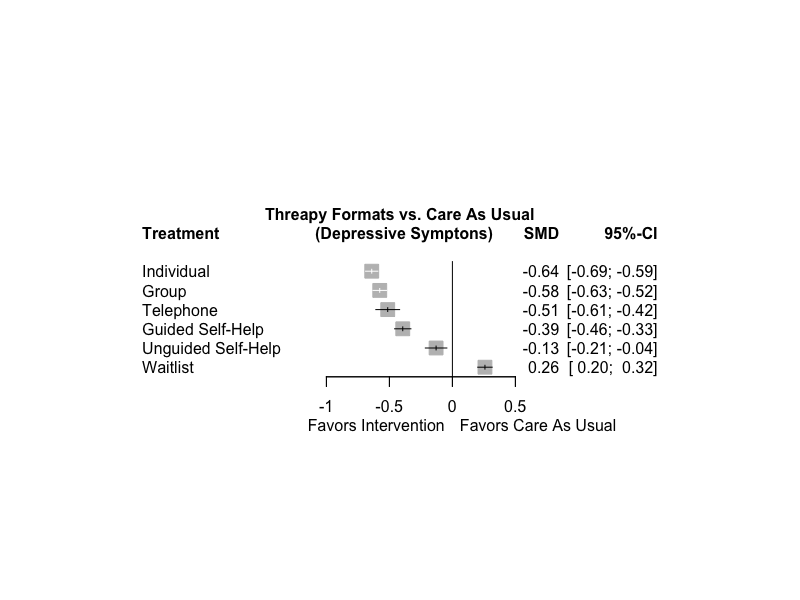

In [41]:
forest(
  m_netmeta,
  reference.group = "cau",
  sortvar = TE,
  xlim = c(-1.3, 0.5),
  smlab = paste("Threapy Formats vs. Care As Usual \n",
                "(Depressive Symptons)"),
  drop.reference.group = TRUE,
  label.left = "Favors Intervention",
  label.right = "Favors Care As Usual",
  labels = long_labels
)

# 评估结果的有效性

## 网络热图

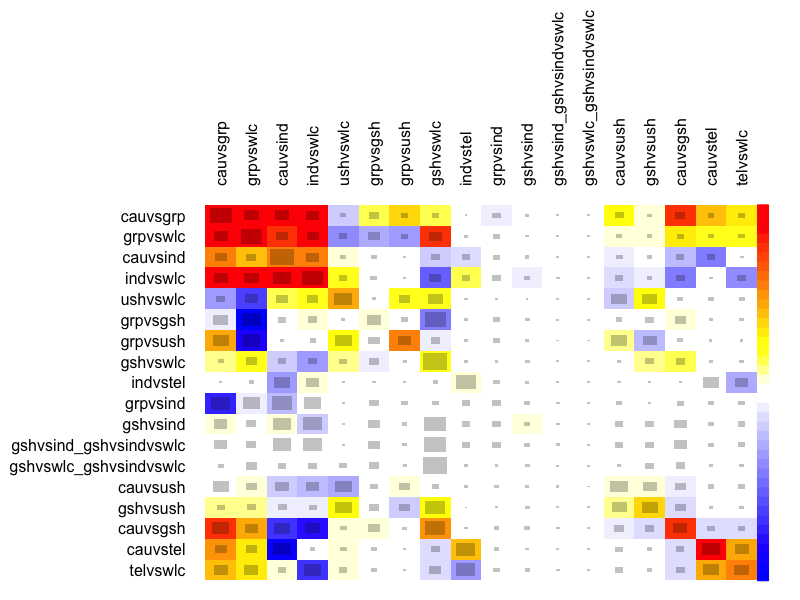

In [42]:
netheat(m_netmeta)

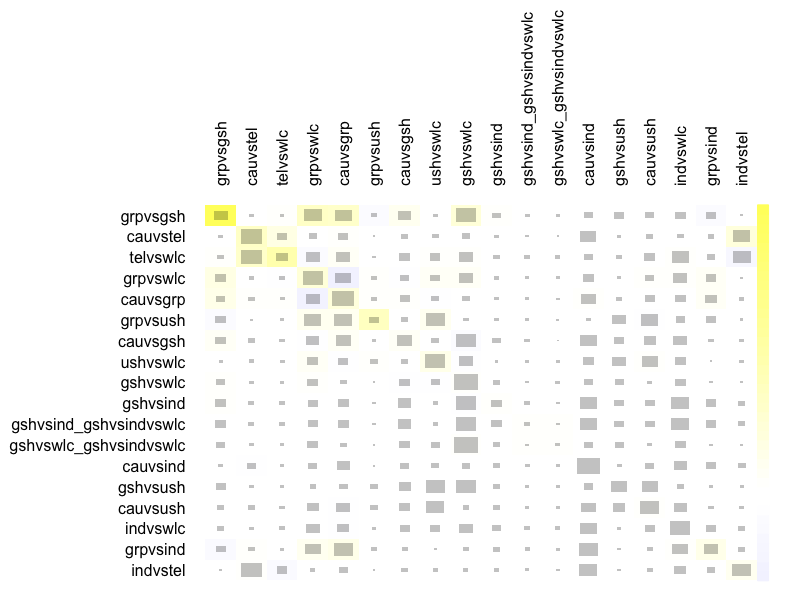

In [43]:
# 检查一下随机效应模型的热图
netheat(m_netmeta, random = TRUE)

## 网络拆分

In [44]:
netsplit(m_netmeta)

Separate indirect from direct evidence (SIDE) using back-calculation method

Common effects model: 

 comparison  k prop     nma  direct  indir.    Diff     z  p-value
   grpvscau 21 0.58 -0.5767 -0.3727 -0.8628  0.4901  8.72 < 0.0001
   gshvscau  8 0.22 -0.3940 -0.5684 -0.3442 -0.2243 -2.82   0.0048
   indvscau 30 0.71 -0.6403 -0.7037 -0.4863 -0.2174 -3.97 < 0.0001
   telvscau  6 0.35 -0.5134 -0.7471 -0.3867 -0.3604 -3.57   0.0004
   ushvscau  9 0.35 -0.1294 -0.1919 -0.0953 -0.0966 -1.06   0.2903
   grpvsgsh  5 0.24 -0.1827 -0.2332 -0.1670 -0.0663 -0.91   0.3629
   grpvsind  7 0.09  0.0636  0.1004  0.0598  0.0406  0.37   0.7099
   grpvsush  1 0.17 -0.4473 -0.6750 -0.4023 -0.2727 -2.31   0.0210
   grpvswlc 18 0.58 -0.8351 -0.9817 -0.6352 -0.3465 -6.62 < 0.0001
   gshvsind  4 0.03  0.2462  0.1080  0.2512 -0.1432 -0.76   0.4496
   gshvsush  5 0.29 -0.2646 -0.4001 -0.2086 -0.1915 -2.00   0.0454
   gshvswlc 36 0.73 -0.6524 -0.6134 -0.7594  0.1460  2.64   0.0083
   indvstel  4 0.50 -0.1269 

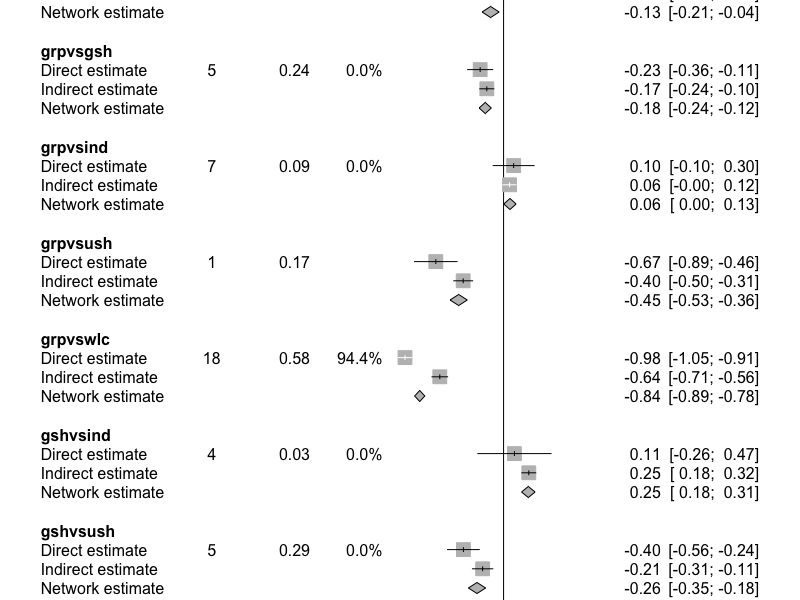

In [ ]:
library(tidyverse)
netsplit(m_netmeta) %>% forest()

## 调整比较漏斗图

Warning message:
Use argument 'method.bias' instead of 'linreg' (deprecated). 


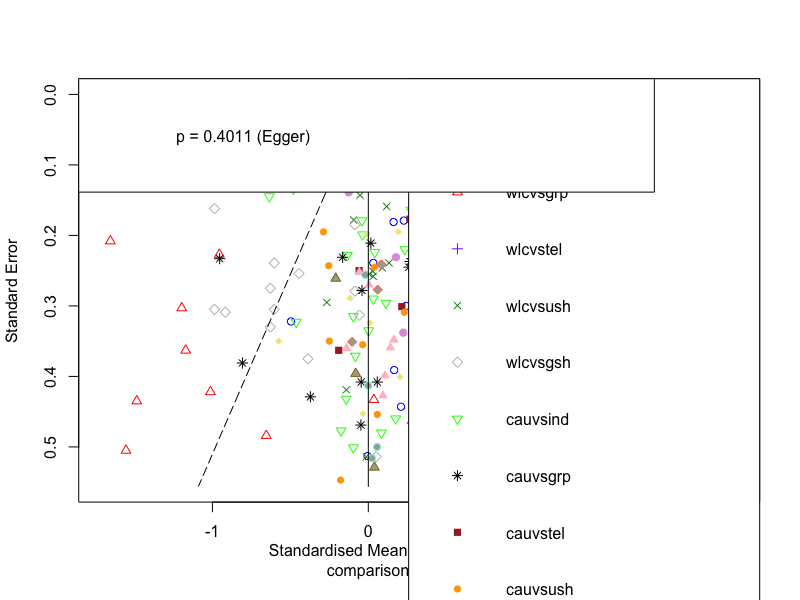

In [48]:
funnel(
  m_netmeta,
  order =c("wlc", "cau", "ind", "grp", # from old to new
            "tel", "ush", "gsh"),
  pch = c(1:4, 5, 6, 8, 15:19, 21:24),
  col = c("blue", "red", "purple", "forestgreen", "grey",
          "green", "black", "brown", "orange", "pink",
          "khaki", "plum", "aquamarine", "sandybrown",
          "coral", "gold4"),
  linreg = TRUE
)